## A map of Intracellular Electrophysiology Data on DANDI

In my second year of undergrad, I took a cellular neurophysiology course knowing nothing about the topic or field. This course blew me away; the idea that you could record directly from single neurons and 'see' their inner workings was (and still is) incredible to me. This inspired what is now a almost a decade long academic journey, one where I learned the ups and downs of patch-clamp electrophysiology. 
I am happy to see the rise in open intracellular 

## Examining the data

Lets take a look at the overall embedding of the data. I 

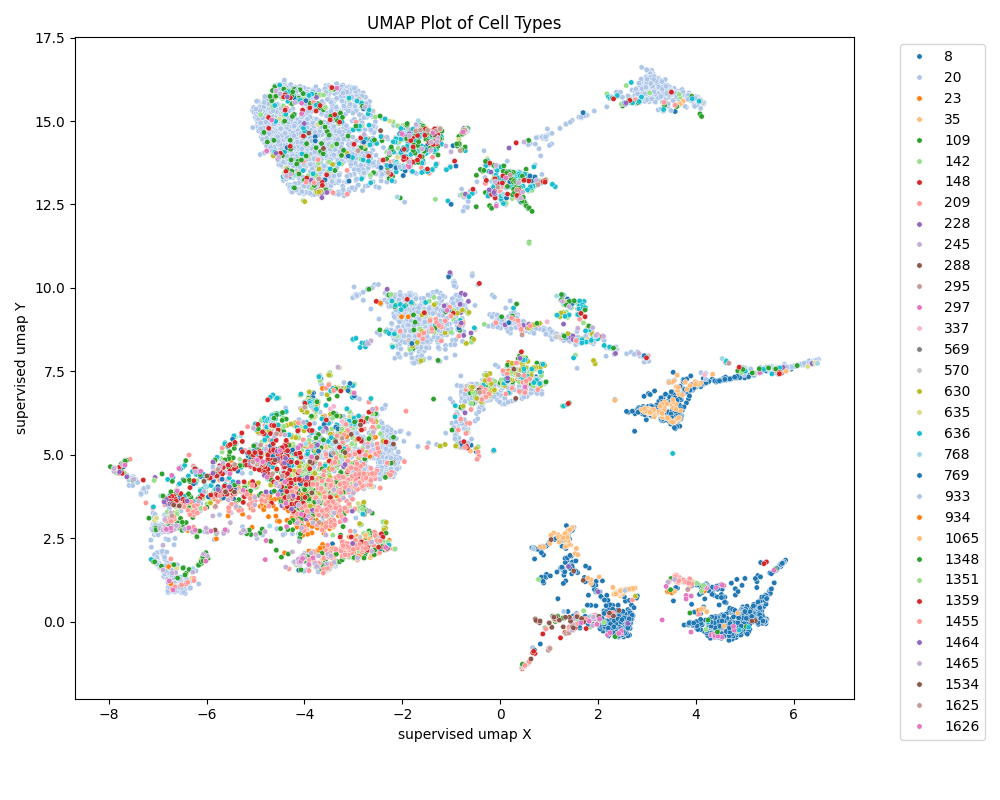

In [1]:
#load the data
%matplotlib ipympl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('all_new.csv')
#display the umap plot
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='supervised umap X', y='supervised umap Y', hue='dandiset_id', palette='tab20', s=15)
plt.title('UMAP Plot of Cell Types')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

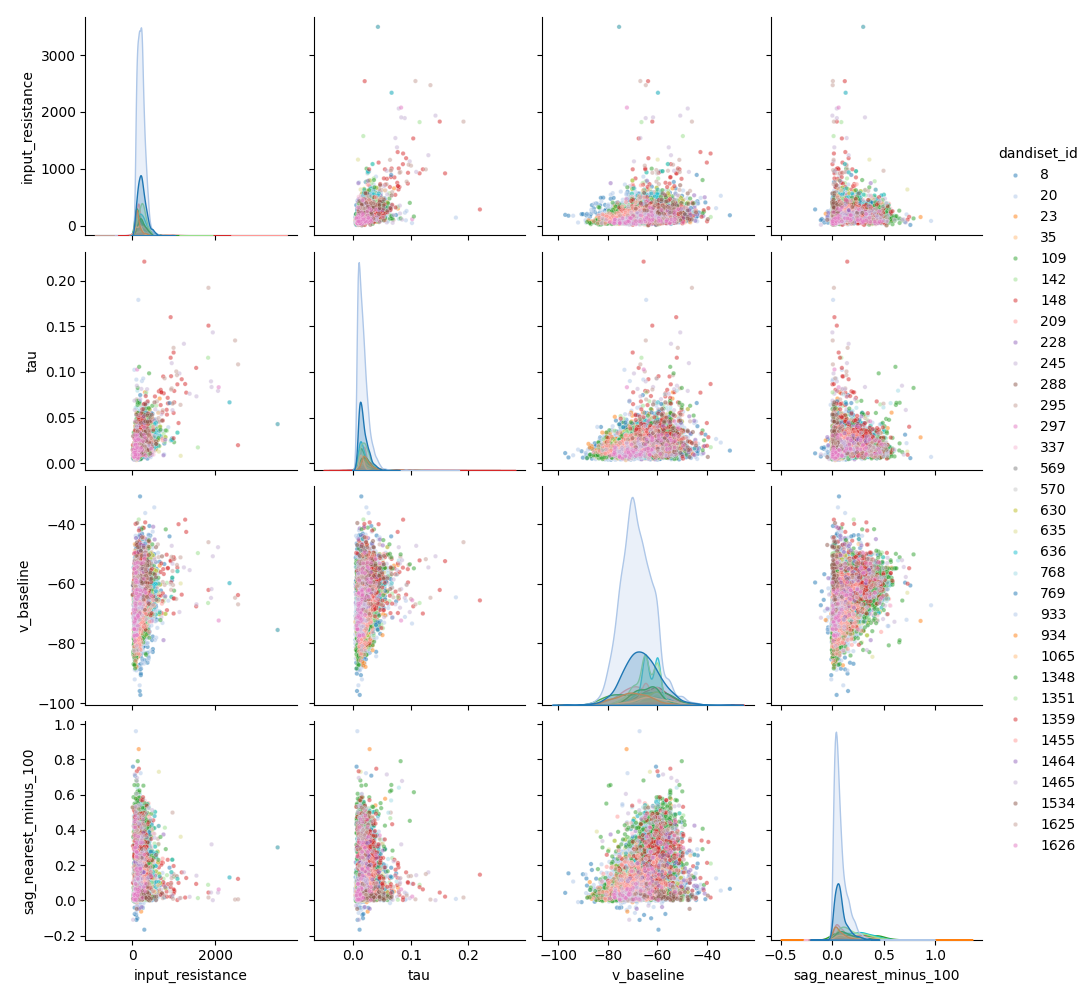

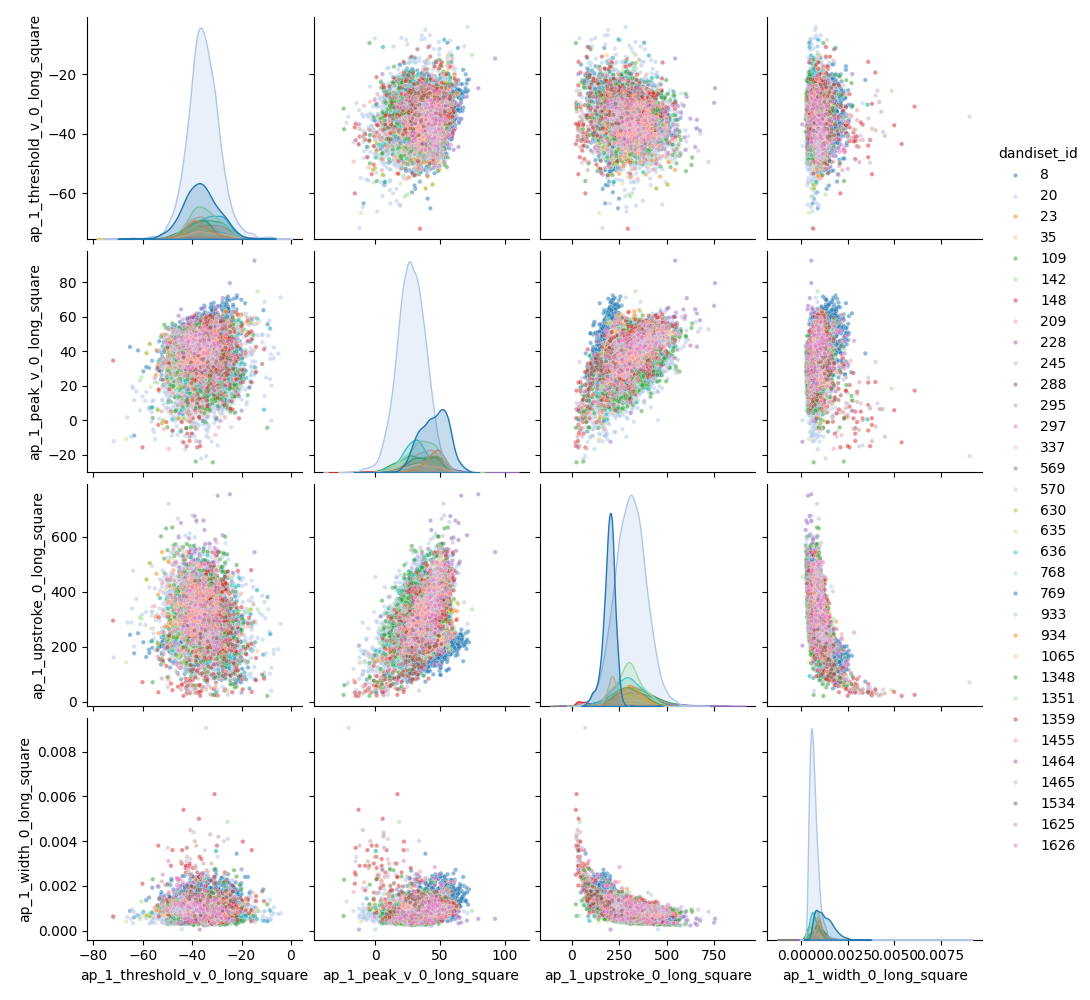

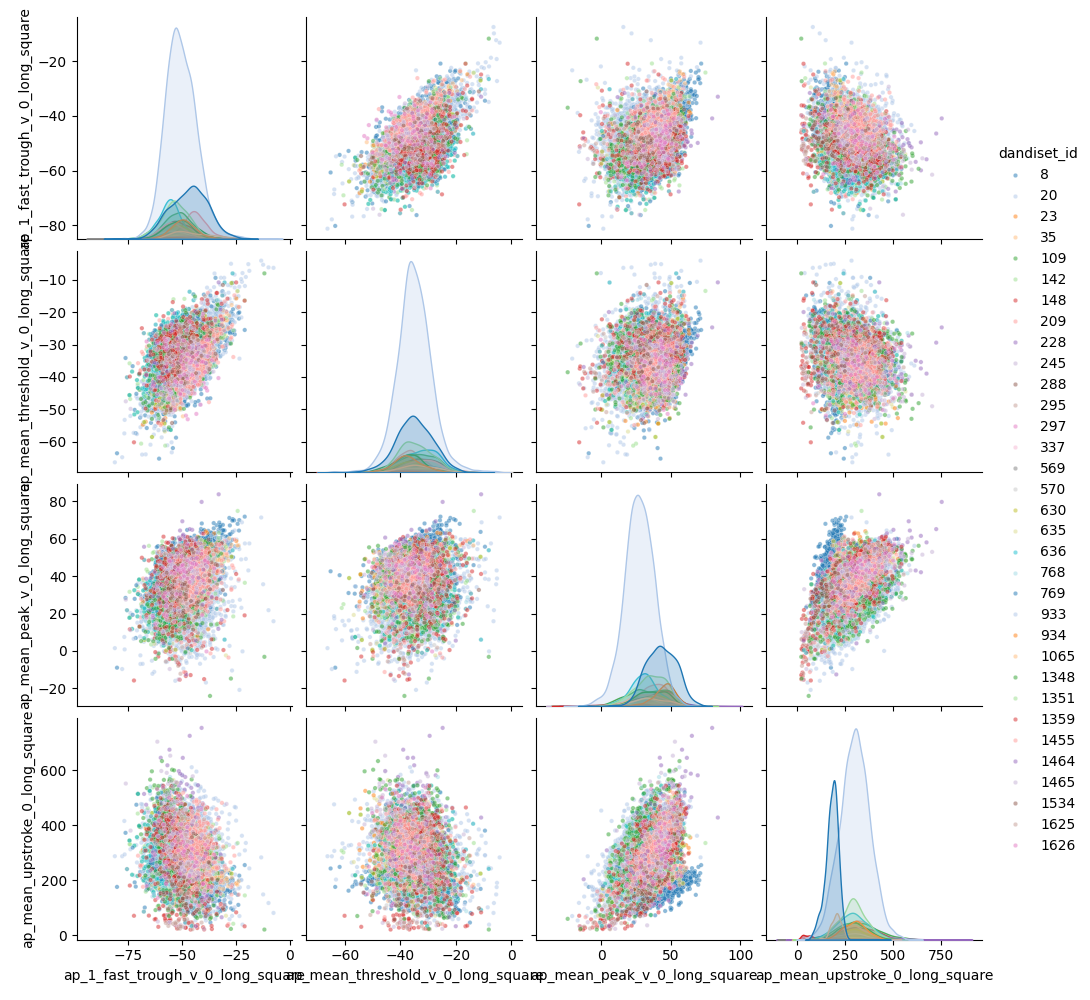

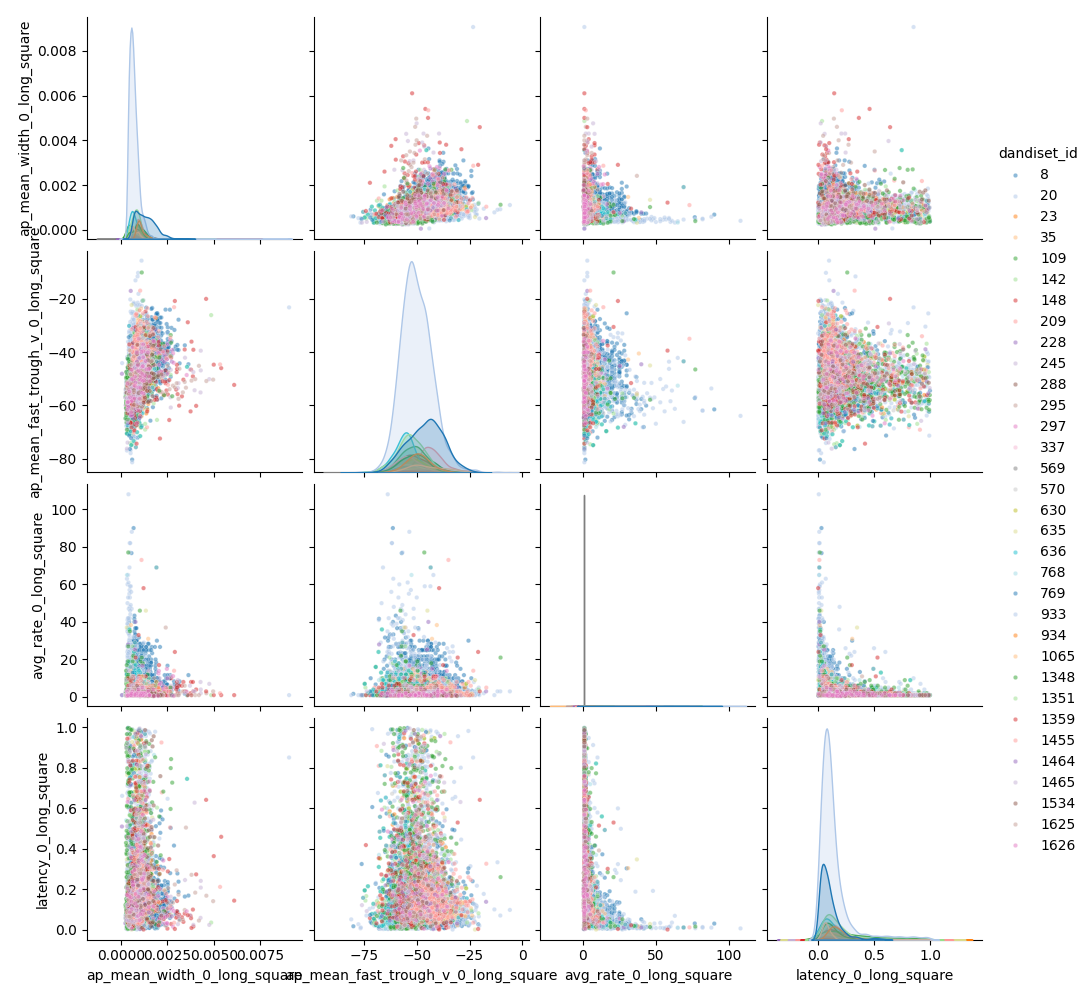

In [2]:
#plot a couple feature distributions
features_used = ['input_resistance', 'tau', 'v_baseline', 'sag_nearest_minus_100', 
       'ap_1_threshold_v_0_long_square', 'ap_1_peak_v_0_long_square',
       'ap_1_upstroke_0_long_square',# 'ap_1_downstroke_0_long_square',
       #'ap_1_upstroke_downstroke_ratio_0_long_square',
       'ap_1_width_0_long_square', 'ap_1_fast_trough_v_0_long_square',
       'ap_mean_threshold_v_0_long_square', 'ap_mean_peak_v_0_long_square',
       'ap_mean_upstroke_0_long_square', #'ap_mean_downstroke_0_long_square',
       #'ap_mean_upstroke_downstroke_ratio_0_long_square',
       'ap_mean_width_0_long_square', 'ap_mean_fast_trough_v_0_long_square',
       'avg_rate_0_long_square', 'latency_0_long_square',]

#run 4 pairplots for some features
for i in range(0, len(features_used), 4):
    subset = features_used[i:i+4]
    sns.pairplot(data, vars=subset, hue='dandiset_id', palette='tab20', diag_kind='kde', plot_kws={'alpha':0.5, 's':10})
    plt.suptitle(f'Pairplot of Features: {", ".join(subset)}', y=1.02)
    plt.show()


## The process

### Part 1: Getting a consistent protocol

The first step in collating the data is finding some common features to analyze. 

In [3]:
##